In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt


In [2]:
# Add this in a new cell before model training



In [3]:
train_path = r"C:\Users\thula\Documents\Mini_Project\Dataset\training_set"
test_path = r"C:\Users\thula\Documents\Mini_Project\Dataset\test_set"

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory(train_path, 
                                              target_size=(64,64), 
                                              batch_size=32, 
                                              class_mode='categorical')

test_set = test_datagen.flow_from_directory(test_path, 
                                            target_size=(64,64), 
                                            batch_size=32, 
                                            class_mode='categorical')


Found 78000 images belonging to 26 classes.
Found 26 images belonging to 26 classes.


In [4]:
import json

with open("class_indices.json", "w") as f:
    json.dump(train_set.class_indices, f)

train_set.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

In [5]:
model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(64,64,3)),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(26, activation='softmax')  # 26 classes for A-Z
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 256)        0

In [6]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',     # what to monitor
    patience=5,             # how many epochs to wait before stopping
    restore_best_weights=True  # restore model weights from the epoch with the best value of the monitored quantity
)



# Fit model with EarlyStopping
history=model.fit(
    train_set,
    steps_per_epoch= 120,
    epochs=50,
    validation_data=test_set,
    callbacks=[early_stopping]  # Add the callback here
)



Epoch 1/50
120/120 [==============================] - 119s 932ms/step - loss: 3.2263 - accuracy: 0.0516 - val_loss: 2.8346 - val_accuracy: 0.0769
Epoch 2/50
120/120 [==============================] - 103s 858ms/step - loss: 2.9171 - accuracy: 0.1362 - val_loss: 1.7928 - val_accuracy: 0.4615
Epoch 3/50
120/120 [==============================] - 106s 878ms/step - loss: 2.3930 - accuracy: 0.2643 - val_loss: 1.1977 - val_accuracy: 0.6538
Epoch 4/50
120/120 [==============================] - 102s 850ms/step - loss: 1.9976 - accuracy: 0.3724 - val_loss: 0.7313 - val_accuracy: 0.6538
Epoch 5/50
120/120 [==============================] - 106s 873ms/step - loss: 1.6289 - accuracy: 0.4688 - val_loss: 0.5393 - val_accuracy: 0.7692
Epoch 6/50
120/120 [==============================] - 108s 897ms/step - loss: 1.4186 - accuracy: 0.5456 - val_loss: 0.4984 - val_accuracy: 0.8077
Epoch 7/50
120/120 [==============================] - 105s 870ms/step - loss: 1.2376 - accuracy: 0.5880 - val_loss: 0.2285 -

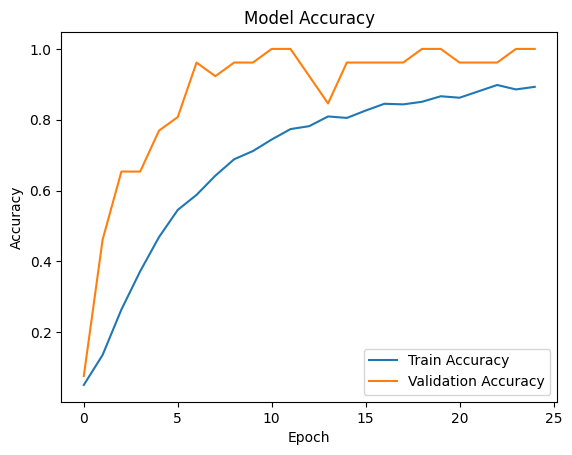

In [7]:
model.save('asl_better_model.h5')

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()


In [11]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the model
model = load_model('asl_better_model.h5')

# Define the path to the test set
test_path = r"C:\Users\thula\Documents\Mini_Project\Dataset\test_set"

# Image size and batch size must match training
IMG_SIZE = 64
BATCH_SIZE = 32

# Test data generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    test_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # Important for accurate evaluation
)

# Evaluate the model
loss, accuracy = model.evaluate(test_set)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Found 26 images belonging to 26 classes.
1/1 [==============================] - 3s 3s/step - loss: 0.0285 - accuracy: 1.0000
Test Accuracy: 100.00%


In [16]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_set)

# Print accuracy as a percentage
print(f"Overall Test Accuracy: {accuracy * 100:.2f}%")


1/1 [==============================] - 1s 858ms/step - loss: 0.0285 - accuracy: 1.0000
Overall Test Accuracy: 100.00%
